In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import numpy as np
from typing import List
import json

In [2]:
washu_outline = gpd.read_file("data/washu_outline.json")

outline = washu_outline["geometry"][0]

raw: gpd.GeoDataFrame = gpd.read_file("data/data.json")

In [3]:
washu = raw[raw.within(outline)]
washu = washu.dropna(subset=["name"])
washu

,id,type,height,levels,ele,area,date,heightScore,name,orient,roofShape,country,geometry
0,04c2d04-0bc99c0-15,education:university,20.1,NaN,160.6,634.1,202103.0,0.95,Monsanto Laboratory,95.0,flat,US,"POLYGON ((-90.30779 38.64747, -90.30780 38.647..."
1,04c2c24-0bc99f4-36,education:university,11.3,NaN,169.2,4382.8,202102.0,0.95,Simon Hall,96.0,pitched,US,"POLYGON ((-90.31210 38.64806, -90.31212 38.647..."
5,04c2c07-0bc98f9-17,education,18.9,NaN,163.8,848.9,202103.0,0.95,Liggett House,95.0,pitched,US,"POLYGON ((-90.31231 38.64464, -90.31232 38.644..."
46,04c2d9e-0bc9999-26,education,16.1,2.0,NaN,2140.4,202102.0,0.95,Hillman Hall,87.0,NaN,US,"POLYGON ((-90.30515 38.64690, -90.30518 38.646..."
47,04c2c12-0bc9983-0c,education:university,8.5,NaN,172.6,279.8,202103.0,0.95,Tietjens Hall,95.0,pitched,US,"POLYGON ((-90.31200 38.64661, -90.31201 38.646..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,04c2d20-0bc99cb-1a,education:university,11.4,NaN,160.6,990.9,202102.0,0.95,Wilson Hall,96.0,flat,US,"POLYGON ((-90.30733 38.64766, -90.30736 38.647..."
734,04c2bb3-0bc98ea-15,education,6.7,NaN,161.5,603.4,202102.0,0.95,Risa Commons,27.0,pitched,US,"POLYGON ((-90.31363 38.64451, -90.31373 38.644..."
738,04c2cb3-0bc9a59-2a,education:university,15.7,NaN,166.5,2852.8,202109.0,0.95,Wrighton Hall,91.0,flat,US,"POLYGON ((-90.30935 38.64968, -90.30937 38.649..."
739,04c2d68-0bc99c7-29,education:university,11.5,NaN,163.7,1517.6,202103.0,0.95,Busch Hall,96.0,pitched,US,"POLYGON ((-90.30623 38.64757, -90.30625 38.647..."


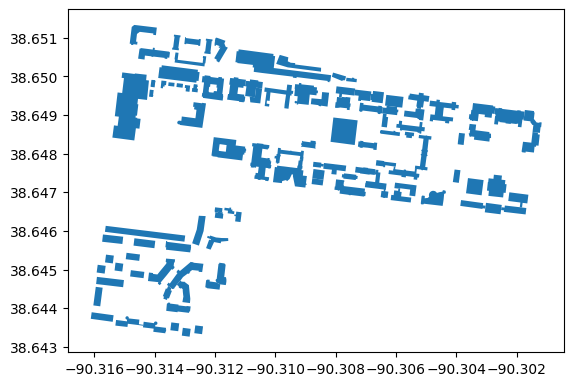

In [5]:
washu.plot()
plt.show()

In [5]:
# fontbonne_ids = {"04c2b19-0bc9857-1f", "04c2b3d-0bc9871-19", "04c2b66-0bc984f-28"}

# edu = raw[(raw["type"] == "education") | (raw["type"] == "education:university")]
# edu = edu[~edu["id"].isin(fontbonne_ids)]
# edu = edu[edu["name"].notnull()]
# edu

In [6]:
# edu.plot()
# plt.show()

In [6]:
washu.to_file("data/washu_buildings.json", driver="GeoJSON")

In [7]:
def convert_geojson_to_entry(features: List[dict]) -> List[dict]:
    entries = []
    for feature in features:
        entry = {}
        entry["id"] = feature["properties"]["id"]
        entry["name"] = feature["properties"]["name"]
        entry["height"] = feature["properties"]["height"]
        entry["type"] = feature["properties"]["type"]
        entry["polygon"] = feature["geometry"]["coordinates"]
        entries.append(entry)
    return entries

In [8]:
j = convert_geojson_to_entry(washu.__geo_interface__["features"])

In [9]:
with open("data/washu_buildings_test.json", "w") as f:
    json.dump(j, f, indent=2)